# Benchmarks for Simple Mat2 Multiply

Now we can do some data analysis on the times and see what happens

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.read_csv('Bench.csv')
df.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])


,AVX2,Unroll,SIMD,Operator,Prefetch,Normal
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,57.492188,56.076172,55.457031,54.491211,55.067383,96.928711
std,180.665610,198.820215,181.636237,183.699018,169.465932,1424.737928
min,49.000000,49.000000,47.000000,47.000000,47.000000,49.000000
25%,51.000000,49.000000,49.000000,48.000000,49.000000,52.000000
50%,52.000000,49.000000,49.000000,48.000000,49.000000,53.000000
75%,53.000000,51.000000,50.000000,50.000000,50.000000,53.000000
90%,54.000000,52.000000,52.000000,50.000000,51.000000,53.000000
99%,54.000000,53.000000,52.000000,52.000000,58.850000,54.000000
99.9%,58.954000,59.931000,71.563000,58.839000,94.977000,71.793000


Text(0.0, 0.5, 'Number of Samples')

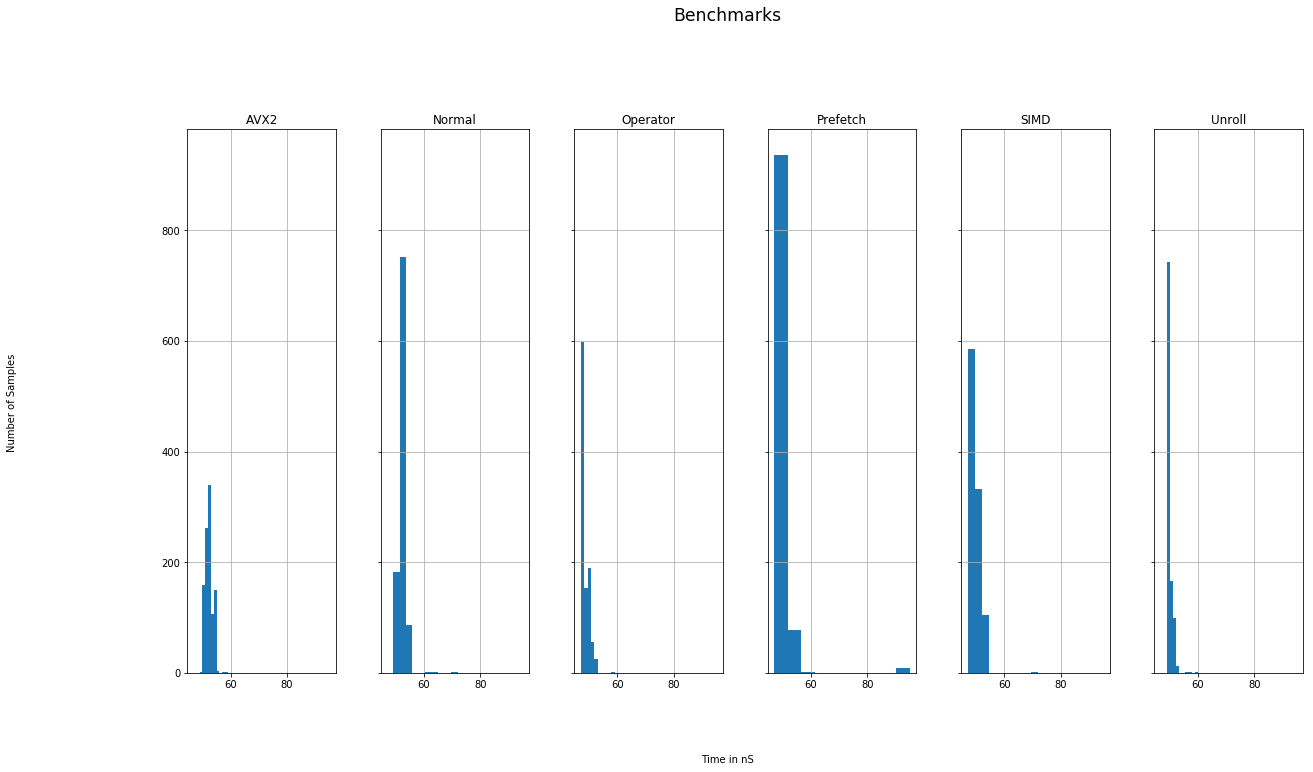

In [11]:
S = df
# keep only the ones that are within +3 to -3 standard deviations  
S=  S[~((S-S.mean()).abs() > 3*S.std())]

ndf = pd.DataFrame(data=S)
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True,
                        figsize=(20, 10))


ndf.hist(grid=True,  bins=10,ax=axes )
plt.suptitle('Benchmarks', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.0, 'Time in nS', ha='center')
fig.text(0.0, 0.5, 'Number of Samples', va='center', rotation='vertical')
